# Player Recommender

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns=None

import warnings
warnings.filterwarnings('ignore')

## General

In [2]:
general = pd.read_html('https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats')[0]
general.columns = general.columns.droplevel()
general = general.query('Rk !="Rk"').reset_index(drop=True)
general = general.drop(columns=['Rk', 'Matches'])

In [3]:
general['Nation'] = general['Nation'].str.split(' ', expand=True, n=1)[1]

general['Comp'] = general['Comp'].str.split(' ', expand=True, n=1)[1]

general['Age'] = general['Age'].str.split('-', expand=True, n=1)[0]

general['Pos'] = general['Pos'].str.replace(',', '-')

In [5]:
general.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG
0,Max Aarons,ENG,DF,Bournemouth,Premier League,24,2000,14,12,1085,12.1,0,1,1,0,0,0,1,0,0.0,0.0,0.8,0.8,19,40,22,0.00,0.08,0.08,0.00,0.08,0.00,0.07,0.07,0.00,0.07
1,Brenden Aaronson,USA,MF-FW,Union Berlin,Bundesliga,23,2000,22,7,695,7.7,2,0,2,2,0,0,3,1,1.2,1.2,0.9,2.0,18,20,43,0.26,0.00,0.26,0.26,0.26,0.15,0.11,0.26,0.15,0.26
2,Paxten Aaronson,USA,MF,Eint Frankfurt,Bundesliga,20,2003,7,1,101,1.1,0,1,1,0,0,0,0,0,0.1,0.1,0.1,0.2,2,5,7,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,36,1987,23,23,2061,22.9,3,0,3,3,0,0,4,0,2.3,2.3,0.2,2.5,32,108,5,0.13,0.00,0.13,0.13,0.13,0.10,0.01,0.11,0.10,0.11
4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,24,2000,24,16,1462,16.2,0,0,0,0,0,0,2,0,0.8,0.8,0.5,1.3,10,77,19,0.00,0.00,0.00,0.00,0.00,0.05,0.03,0.08,0.05,0.08


## Shooting

In [6]:
shooting = pd.read_html('https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats')[0]
shooting.columns = shooting.columns.droplevel()
shooting = shooting.query('Rk !="Rk"').reset_index(drop=True)
redundant = ['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s', 'Matches']
shooting = shooting.drop(columns=redundant)

In [7]:
shooting.head()

,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,0,1,0,0.0,0.08,0.00,0.00,NaN,23.9,0,0,0,0.0,0.0,0.02,0.0,0.0
1,2,7,4,57.1,0.91,0.52,0.29,0.50,15.5,0,0,0,1.2,1.2,0.17,+0.8,+0.8
2,0,2,2,100.0,1.78,1.78,0.00,0.00,15.1,0,0,0,0.1,0.1,0.06,-0.1,-0.1
3,3,17,7,41.2,0.74,0.31,0.18,0.43,14.3,0,0,0,2.3,2.3,0.13,+0.7,+0.7
4,0,5,0,0.0,0.31,0.00,0.00,NaN,21.6,0,0,0,0.8,0.8,0.17,-0.8,-0.8


## Passing

In [9]:
passing = pd.read_html('https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats')[0]
passing.columns = passing.columns.droplevel()
passing = passing.query('Rk !="Rk"').reset_index(drop=True)
redundant = ['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s', 'Matches']
passing = passing.drop(columns=redundant)

In [11]:
passing.head()

,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP
0,379,501,75.6,6256,2424,186,213,87.3,156,202,77.2,31,56,55.4,1,0.8,0.9,+0.2,7,22,12,2,40
1,187,244,76.6,2368,608,117,133,88.0,45,59,76.3,6,17,35.3,0,0.9,0.9,-0.9,9,19,2,0,20
2,41,50,82.0,576,71,20,25,80.0,20,22,90.9,0,2,0.0,1,0.1,0.1,+0.9,1,4,2,0,5
3,1205,1432,84.1,22999,7213,371,418,88.8,706,779,90.6,107,193,55.4,0,0.2,0.5,-0.2,5,108,2,0,108
4,775,870,89.1,12162,2946,383,423,90.5,323,351,92.0,40,52,76.9,0,0.5,1.1,-0.5,6,86,5,2,77


## Pass Types

In [13]:
pass_types = pd.read_html('https://fbref.com/en/comps/Big5/passing_types/players/Big-5-European-Leagues-Stats')[0]
pass_types.columns = pass_types.columns.droplevel()
pass_types = pass_types.query('Rk !="Rk"').reset_index(drop=True)
redundant = ['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s', 'Matches']
pass_types = pass_types.drop(columns=redundant)

In [15]:
pass_types.head()

,Att,Live,Dead,FK,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp,Off,Blocks
0,501,385,115,10,2,3,11,105,0,0,0,0,379,1,20
1,244,227,15,2,4,0,12,2,6,2,3,0,187,2,9
2,50,48,2,1,0,0,0,1,0,0,0,0,41,0,0
3,1432,1300,125,48,2,10,2,28,0,0,0,0,1205,7,15
4,870,850,18,17,0,1,3,1,0,0,0,0,775,2,17


## Goal and Shot Creation

In [16]:
goal_shot = pd.read_html('https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats')[0]
goal_shot.columns = goal_shot.columns.droplevel()
goal_shot = goal_shot.query('Rk !="Rk"').reset_index(drop=True)
redundant = ['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s', 'Matches']
goal_shot = goal_shot.drop(columns=redundant)

In [18]:
goal_shot.head()

,SCA,SCA90,PassLive,PassDead,TO,Sh,Fld,Def,GCA,GCA90,PassLive,PassDead,TO,Sh,Fld,Def
0,20,1.67,15,2,0,0,3,0,1,0.08,1,0,0,0,0,0
1,20,2.59,17,1,0,2,0,0,3,0.39,3,0,0,0,0,0
2,1,0.89,1,0,0,0,0,0,1,0.89,1,0,0,0,0,0
3,16,0.70,12,1,0,2,1,0,0,0.00,0,0,0,0,0,0
4,25,1.54,25,0,0,0,0,0,3,0.18,3,0,0,0,0,0


## Defensive Actions

In [19]:
defense = pd.read_html('https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats')[0]
defense.columns = defense.columns.droplevel()
defense = defense.query('Rk !="Rk"').reset_index(drop=True)
redundant = ['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s', 'Matches']
defense = defense.drop(columns=redundant)

In [21]:
defense.head()

,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err
0,28,18,20,6,2,19,30,63.3,11,9,5,4,6,34,23,0
1,17,11,6,8,3,8,17,47.1,9,16,0,16,1,18,3,0
2,2,2,1,1,0,1,1,100.0,0,2,0,2,0,2,0,0
3,45,25,22,19,4,18,33,54.5,15,37,24,13,27,72,71,1
4,20,14,8,9,3,7,15,46.7,8,10,1,9,11,31,16,0


## Possesion

In [22]:
possession = pd.read_html('https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats')[0]
possession.columns = possession.columns.droplevel()
possession = possession.query('Rk !="Rk"').reset_index(drop=True)
redundant = ['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s', 'Matches']
possession = possession.drop(columns=redundant)

In [24]:
possession.head()

,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Att,Succ,Succ%,Tkld,Tkld%,Carries,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR
0,615,37,223,264,137,11,615,31,12,38.7,11,35.5,314,1908,998,19,11,7,11,7,310,22
1,356,5,59,166,146,22,356,36,14,38.9,21,58.3,209,1347,667,18,16,2,27,19,232,43
2,72,0,6,39,28,5,72,7,2,28.6,4,57.1,43,193,50,2,0,1,5,4,46,7
3,1684,200,722,891,86,27,1684,14,8,57.1,6,42.9,1193,6905,3937,32,16,0,20,3,1115,5
4,986,21,160,626,211,7,986,18,7,38.9,10,55.6,783,4183,1614,10,31,0,20,11,756,19


## Miscellaneous Stats

In [25]:
miscellaneous = pd.read_html('https://fbref.com/en/comps/Big5/misc/players/Big-5-European-Leagues-Stats')[0]
miscellaneous.columns = miscellaneous.columns.droplevel()
miscellaneous = miscellaneous.query('Rk !="Rk"').reset_index(drop=True)
redundant = ['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s', 'Matches']
miscellaneous = miscellaneous.drop(columns=redundant)

In [27]:
miscellaneous.head()

,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%
0,1,0,0,11,25,2,11,6,18,0,1,0,69,4,9,30.8
1,3,1,1,6,10,3,12,1,11,0,0,0,48,7,13,35.0
2,0,0,0,6,4,0,0,0,2,0,0,0,5,3,0,100.0
3,4,0,0,20,10,0,2,27,25,0,0,1,118,44,26,62.9
4,2,0,0,32,16,0,3,11,14,0,3,0,86,2,7,22.2


## Combining into a single dataframe

In [64]:
df = pd.concat([general, shooting, passing, pass_types,
                goal_shot, defense, possession, miscellaneous], axis=1)

df

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP,Att,Live,Dead,FK,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp,Off,Blocks,SCA,SCA90,PassLive,PassDead,TO,Sh,Fld,Def,GCA,GCA90,PassLive,PassDead,TO,Sh,Fld,Def,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Att,Succ,Succ%,Tkld,Tkld%,Carries,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%
0,Max Aarons,ENG,DF,Bournemouth,Premier League,24,2000,14,12,1085,12.1,0,1,1,0,0,0,1,0,0.0,0.0,0.8,0.8,19,40,22,0.00,0.08,0.08,0.00,0.08,0.00,0.07,0.07,0.00,0.07,0,1,0,0.0,0.08,0.00,0.00,NaN,23.9,0,0,0,0.0,0.0,0.02,0.0,0.0,379,501,75.6,6256,2424,186,213,87.3,156,202,77.2,31,56,55.4,1,0.8,0.9,+0.2,7,22,12,2,40,501,385,115,10,2,3,11,105,0,0,0,0,379,1,20,20,1.67,15,2,0,0,3,0,1,0.08,1,0,0,0,0,0,28,18,20,6,2,19,30,63.3,11,9,5,4,6,34,23,0,615,37,223,264,137,11,615,31,12,38.7,11,35.5,314,1908,998,19,11,7,11,7,310,22,1,0,0,11,25,2,11,6,18,0,1,0,69,4,9,30.8
1,Brenden Aaronson,USA,MF-FW,Union Berlin,Bundesliga,23,2000,22,7,695,7.7,2,0,2,2,0,0,3,1,1.2,1.2,0.9,2.0,18,20,43,0.26,0.00,0.26,0.26,0.26,0.15,0.11,0.26,0.15,0.26,2,7,4,57.1,0.91,0.52,0.29,0.50,15.5,0,0,0,1.2,1.2,0.17,+0.8,+0.8,187,244,76.6,2368,608,117,133,88.0,45,59,76.3,6,17,35.3,0,0.9,0.9,-0.9,9,19,2,0,20,244,227,15,2,4,0,12,2,6,2,3,0,187,2,9,20,2.59,17,1,0,2,0,0,3,0.39,3,0,0,0,0,0,17,11,6,8,3,8,17,47.1,9,16,0,16,1,18,3,0,356,5,59,166,146,22,356,36,14,38.9,21,58.3,209,1347,667,18,16,2,27,19,232,43,3,1,1,6,10,3,12,1,11,0,0,0,48,7,13,35.0
2,Paxten Aaronson,USA,MF,Eint Frankfurt,Bundesliga,20,2003,7,1,101,1.1,0,1,1,0,0,0,0,0,0.1,0.1,0.1,0.2,2,5,7,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19,0,2,2,100.0,1.78,1.78,0.00,0.00,15.1,0,0,0,0.1,0.1,0.06,-0.1,-0.1,41,50,82.0,576,71,20,25,80.0,20,22,90.9,0,2,0.0,1,0.1,0.1,+0.9,1,4,2,0,5,50,48,2,1,0,0,0,1,0,0,0,0,41,0,0,1,0.89,1,0,0,0,0,0,1,0.89,1,0,0,0,0,0,2,2,1,1,0,1,1,100.0,0,2,0,2,0,2,0,0,72,0,6,39,28,5,72,7,2,28.6,4,57.1,43,193,50,2,0,1,5,4,46,7,0,0,0,6,4,0,0,0,2,0,0,0,5,3,0,100.0
3,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,36,1987,23,23,2061,22.9,3,0,3,3,0,0,4,0,2.3,2.3,0.2,2.5,32,108,5,0.13,0.00,0.13,0.13,0.13,0.10,0.01,0.11,0.10,0.11,3,17,7,41.2,0.74,0.31,0.18,0.43,14.3,0,0,0,2.3,2.3,0.13,+0.7,+0.7,1205,1432,84.1,22999,7213,371,418,88.8,706,779,90.6,107,193,55.4,0,0.2,0.5,-0.2,5,108,2,0,108,1432,1300,125,48,2,10,2,28,0,0,0,0,1205,7,15,16,0.70,12,1,0,2,1,0,0,0.00,0,0,0,0,0,0,45,25,22,19,4,18,33,54.5,15,37,24,13,27,72,71,1,1684,200,722,891,86,27,1684,14,8,57.1,6,42.9,1193,6905,3937,32,16,0,20,3,1115,5,4,0,0,20,10,0,2,27,25,0,0,1,118,44,26,62.9
4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,24,2000,24,16,1462,16.2,0,0,0,0,0,0,2,0,0.8,0.8,0.5,1.3,10,77,19,0.00,0.00,0.00,0.00,0.00,0.05,0.03,0.08,0.05,0.08,0,5,0,0.0,0.31,0.00,0.00,NaN,21.6,0,0,0,0.8,0.8,0.17,-0.8,-0.8,775,870,89.1,12162,2946,383,423,90.5,323,351,92.0,40,52,76.9,0,0.5,1.1,-0.5,6,86,5,2,77,870,850,18,17,0,1,3,1,0,0,0,0,775,2,17,25,1.54,25,0,0,0,0,0,3,0.18,3,0,0,0,0,0,20,14,8,9,3,7,15,46.7,8,10,1,9,11,31,16,0,986,21,160,626,211,7,986,18,7,38.9,10,55.6,783,4183,1614,10,31,0,20,11,756,19,2,0,0,32,16,0,3,11,14,0,3,0,86,2,7,22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [65]:
# Columns to not rename
excluded = df.columns[~df.columns.duplicated(keep=False)]

# An incrementer
import itertools
inc = itertools.count().__next__

# A renamer
def ren(name):
    return f'{name}_{inc()}' if name not in excluded else name

# Use inside rename()
df = df.rename(columns=ren)

f'Duplicate columns: {len([column for column in list(df.columns) if list(df.columns).count(column) > 1])}'

'Duplicate columns: 0'

## Dealing with null values

In [72]:
df = df.fillna(0)

f'Null values: {len([i for i in df.isna().sum() if i!=0])}'

'Null values: 0'

In [109]:
df

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls_0,Ast_1,G+A_2,G-PK_3,PK_4,PKatt_5,CrdY_6,CrdR_7,xG_8,npxG_9,xAG_10,npxG+xAG_11,PrgC_12,PrgP_13,PrgR_14,Gls_15,Ast_16,G+A_17,G-PK_18,G+A-PK,xG_19,xAG_20,xG+xAG,npxG_21,npxG+xAG_22,Gls_23,Sh_24,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK_25,PK_26,PKatt_27,xG_28,npxG_29,npxG/Sh,G-xG,np:G-xG,Cmp_30,Att_31,Cmp%_32,TotDist_33,PrgDist_34,Cmp_35,Att_36,Cmp%_37,Cmp_38,Att_39,Cmp%_40,Cmp_41,Att_42,Cmp%_43,Ast_44,xAG_45,xA,A-xAG,KP,1/3_46,PPA,CrsPA,PrgP_47,Att_48,Live_49,Dead,FK_50,TB,Sw,Crs_51,TI,CK,In,Out,Str,Cmp_52,Off_53,Blocks_54,SCA,SCA90,PassLive_55,PassDead_56,TO_57,Sh_58,Fld_59,Def_60,GCA,GCA90,PassLive_61,PassDead_62,TO_63,Sh_64,Fld_65,Def_66,Tkl_67,TklW_68,Def 3rd_69,Mid 3rd_70,Att 3rd_71,Tkl_72,Att_73,Tkl%,Lost_74,Blocks_75,Sh_76,Pass,Int_77,Tkl+Int,Clr,Err,Touches,Def Pen,Def 3rd_78,Mid 3rd_79,Att 3rd_80,Att Pen,Live_81,Att_82,Succ,Succ%,Tkld,Tkld%,Carries,TotDist_83,PrgDist_84,PrgC_85,1/3_86,CPA,Mis,Dis,Rec,PrgR_87,CrdY_88,CrdR_89,2CrdY,Fls,Fld_90,Off_91,Crs_92,Int_93,TklW_94,PKwon,PKcon,OG,Recov,Won,Lost_95,Won%
0,Max Aarons,ENG,DF,Bournemouth,Premier League,24,2000,14,12,1085,12.1,0,1,1,0,0,0,1,0,0.0,0.0,0.8,0.8,19,40,22,0.00,0.08,0.08,0.00,0.08,0.00,0.07,0.07,0.00,0.07,0,1,0,0.0,0.08,0.00,0.00,0,23.9,0,0,0,0.0,0.0,0.02,0.0,0.0,379,501,75.6,6256,2424,186,213,87.3,156,202,77.2,31,56,55.4,1,0.8,0.9,0.2,7,22,12,2,40,501,385,115,10,2,3,11,105,0,0,0,0,379,1,20,20,1.67,15,2,0,0,3,0,1,0.08,1,0,0,0,0,0,28,18,20,6,2,19,30,63.3,11,9,5,4,6,34,23,0,615,37,223,264,137,11,615,31,12,38.7,11,35.5,314,1908,998,19,11,7,11,7,310,22,1,0,0,11,25,2,11,6,18,0,1,0,69,4,9,30.8
1,Brenden Aaronson,USA,MF-FW,Union Berlin,Bundesliga,23,2000,22,7,695,7.7,2,0,2,2,0,0,3,1,1.2,1.2,0.9,2.0,18,20,43,0.26,0.00,0.26,0.26,0.26,0.15,0.11,0.26,0.15,0.26,2,7,4,57.1,0.91,0.52,0.29,0.50,15.5,0,0,0,1.2,1.2,0.17,0.8,0.8,187,244,76.6,2368,608,117,133,88.0,45,59,76.3,6,17,35.3,0,0.9,0.9,-0.9,9,19,2,0,20,244,227,15,2,4,0,12,2,6,2,3,0,187,2,9,20,2.59,17,1,0,2,0,0,3,0.39,3,0,0,0,0,0,17,11,6,8,3,8,17,47.1,9,16,0,16,1,18,3,0,356,5,59,166,146,22,356,36,14,38.9,21,58.3,209,1347,667,18,16,2,27,19,232,43,3,1,1,6,10,3,12,1,11,0,0,0,48,7,13,35.0
2,Paxten Aaronson,USA,MF,Eint Frankfurt,Bundesliga,20,2003,7,1,101,1.1,0,1,1,0,0,0,0,0,0.1,0.1,0.1,0.2,2,5,7,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19,0,2,2,100.0,1.78,1.78,0.00,0.00,15.1,0,0,0,0.1,0.1,0.06,-0.1,-0.1,41,50,82.0,576,71,20,25,80.0,20,22,90.9,0,2,0.0,1,0.1,0.1,0.9,1,4,2,0,5,50,48,2,1,0,0,0,1,0,0,0,0,41,0,0,1,0.89,1,0,0,0,0,0,1,0.89,1,0,0,0,0,0,2,2,1,1,0,1,1,100.0,0,2,0,2,0,2,0,0,72,0,6,39,28,5,72,7,2,28.6,4,57.1,43,193,50,2,0,1,5,4,46,7,0,0,0,6,4,0,0,0,2,0,0,0,5,3,0,100.0
3,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,36,1987,23,23,2061,22.9,3,0,3,3,0,0,4,0,2.3,2.3,0.2,2.5,32,108,5,0.13,0.00,0.13,0.13,0.13,0.10,0.01,0.11,0.10,0.11,3,17,7,41.2,0.74,0.31,0.18,0.43,14.3,0,0,0,2.3,2.3,0.13,0.7,0.7,1205,1432,84.1,22999,7213,371,418,88.8,706,779,90.6,107,193,55.4,0,0.2,0.5,-0.2,5,108,2,0,108,1432,1300,125,48,2,10,2,28,0,0,0,0,1205,7,15,16,0.70,12,1,0,2,1,0,0,0.00,0,0,0,0,0,0,45,25,22,19,4,18,33,54.5,15,37,24,13,27,72,71,1,1684,200,722,891,86,27,1684,14,8,57.1,6,42.9,1193,6905,3937,32,16,0,20,3,1115,5,4,0,0,20,10,0,2,27,25,0,0,1,118,44,26,62.9
4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,24,2000,24,16,1462,16.2,0,0,0,0,0,0,2,0,0.8,0.8,0.5,1.3,10,77,19,0.00,0.00,0.00,0.00,0.00,0.05,0.03,0.08,0.05,0.08,0,5,0,0.0,0.31,0.00,0.00,0,21.6,0,0,0,0.8,0.8,0.17,-0.8,-0.8,775,870,89.1,12162,2946,383,423,90.5,323,351,92.0,40,52,76.9,0,0.5,1.1,-0.5,6,86,5,2,77,870,850,18,17,0,1,3,1,0,0,0,0,775,2,17,25,1.54,25,0,0,0,0,0,3,0.18,3,0,0,0,0,0,20,14,8,9,3,7,15,46.7,8,10,1,9,11,31,16,0,986,21,160,626,211,7,986,18,7,38.9,10,55.6,783,4183,1614,10,31,0,20,11,756,19,2,0,0,32,16,0,3,11,14,0,3,0,86,2,7,22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [106]:
df['G-xG'] = df['G-xG'].str.replace('+', '')

df['np:G-xG'] = df['np:G-xG'].str.replace('+', '')

df['A-xAG'] = df['A-xAG'].str.replace('+', '')

df[['Age', 'Born', 'MP', 'Starts', 'Min']] = df[['Age', 'Born', 'MP', 'Starts', 'Min']].astype(int)

df.iloc[:,10:] = df.iloc[:,10:].astype(float)

## Toggle Per90 Stats

In [67]:
df.iloc[:,11:26] = df.iloc[:,11:26].div(df['90s'], axis=0).round(2)
df.iloc[:,36:39] = df.iloc[:,36:39].div(df['90s'], axis=0).round(2)
df.iloc[:,45:50] = df.iloc[:,45:50].div(df['90s'], axis=0).round(2)
df.iloc[:,51:53] = df.iloc[:,51:53].div(df['90s'], axis=0).round(2)
df.iloc[:,53:55] = df.iloc[:,53:55].div(df['90s'], axis=0).round(2)
df.iloc[:,56:60] = df.iloc[:,56:60].div(df['90s'], axis=0).round(2)
df.iloc[:,61:63] = df.iloc[:,61:63].div(df['90s'], axis=0).round(2)
df.iloc[:,64:66] = df.iloc[:,64:66].div(df['90s'], axis=0).round(2)
df.iloc[:,67:76] = df.iloc[:,67:76].div(df['90s'], axis=0).round(2)
df.iloc[:,76:91] = df.iloc[:,76:91].div(df['90s'], axis=0).round(2)
df.iloc[:,91] = df.iloc[:,91].div(df['90s'], axis=0).round(2)
df.iloc[:,93:100] = df.iloc[:,93:100].div(df['90s'], axis=0).round(2)
df.iloc[:,101:107] = df.iloc[:,101:107].div(df['90s'], axis=0).round(2)
df.iloc[:,107:114] = df.iloc[:,107:114].div(df['90s'], axis=0).round(2)
df.iloc[:,115:123] = df.iloc[:,115:123].div(df['90s'], axis=0).round(2)
df.iloc[:,123:132] = df.iloc[:,123:132].div(df['90s'], axis=0).round(2)
df.iloc[:,133] = df.iloc[:,133].div(df['90s'], axis=0).round(2)
df.iloc[:,135:145] = df.iloc[:,135:145].div(df['90s'], axis=0).round(2)
df.iloc[:,145:160] = df.iloc[:,145:160].div(df['90s'], axis=0).round(2)
df = df.fillna(0)
df = df.replace(np.inf, 0)

In [91]:
df

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls_0,Ast_1,G+A_2,G-PK_3,PK_4,PKatt_5,CrdY_6,CrdR_7,xG_8,npxG_9,xAG_10,npxG+xAG_11,PrgC_12,PrgP_13,PrgR_14,Gls_15,Ast_16,G+A_17,G-PK_18,G+A-PK,xG_19,xAG_20,xG+xAG,npxG_21,npxG+xAG_22,Gls_23,Sh_24,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK_25,PK_26,PKatt_27,xG_28,npxG_29,npxG/Sh,G-xG,np:G-xG,Cmp_30,Att_31,Cmp%_32,TotDist_33,PrgDist_34,Cmp_35,Att_36,Cmp%_37,Cmp_38,Att_39,Cmp%_40,Cmp_41,Att_42,Cmp%_43,Ast_44,xAG_45,xA,A-xAG,KP,1/3_46,PPA,CrsPA,PrgP_47,Att_48,Live_49,Dead,FK_50,TB,Sw,Crs_51,TI,CK,In,Out,Str,Cmp_52,Off_53,Blocks_54,SCA,SCA90,PassLive_55,PassDead_56,TO_57,Sh_58,Fld_59,Def_60,GCA,GCA90,PassLive_61,PassDead_62,TO_63,Sh_64,Fld_65,Def_66,Tkl_67,TklW_68,Def 3rd_69,Mid 3rd_70,Att 3rd_71,Tkl_72,Att_73,Tkl%,Lost_74,Blocks_75,Sh_76,Pass,Int_77,Tkl+Int,Clr,Err,Touches,Def Pen,Def 3rd_78,Mid 3rd_79,Att 3rd_80,Att Pen,Live_81,Att_82,Succ,Succ%,Tkld,Tkld%,Carries,TotDist_83,PrgDist_84,PrgC_85,1/3_86,CPA,Mis,Dis,Rec,PrgR_87,CrdY_88,CrdR_89,2CrdY,Fls,Fld_90,Off_91,Crs_92,Int_93,TklW_94,PKwon,PKcon,OG,Recov,Won,Lost_95,Won%
0,Max Aarons,ENG,DF,Bournemouth,Premier League,24,2000,14,12,1085,12.1,0.00,0.08,0.08,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.07,0.07,1.57,3.31,1.82,0.00,0.08,0.08,0.00,0.08,0.00,0.07,0.07,0.00,0.07,0.00,0.08,0.00,0.0,0.08,0.00,0.00,0.00,23.9,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,31.32,41.40,75.6,517.02,200.33,15.37,17.60,87.3,12.89,16.69,77.2,2.56,4.63,55.4,0.08,0.07,0.07,0.02,0.58,1.82,0.99,0.17,3.31,41.40,31.82,9.50,0.83,0.17,0.25,0.91,8.68,0.00,0.00,0.00,0.0,31.32,0.08,1.65,1.65,1.67,1.24,0.17,0.00,0.00,0.25,0.00,0.08,0.08,0.08,0.00,0.0,0.00,0.00,0.00,2.31,1.49,1.65,0.50,0.17,1.57,2.48,63.3,0.91,0.74,0.41,0.33,0.50,2.81,1.90,0.00,50.83,3.06,18.43,21.82,11.32,0.91,50.83,2.56,0.99,38.7,0.91,35.5,25.95,157.69,82.48,1.57,0.91,0.58,0.91,0.58,25.62,1.82,0.08,0.00,0.00,0.91,2.07,0.17,0.91,0.50,1.49,0.00,0.08,0.00,5.70,0.33,0.74,30.8
1,Brenden Aaronson,USA,MF-FW,Union Berlin,Bundesliga,23,2000,22,7,695,7.7,0.26,0.00,0.26,0.26,0.00,0.00,0.39,0.13,0.16,0.16,0.12,0.26,2.34,2.60,5.58,0.26,0.00,0.26,0.26,0.26,0.15,0.11,0.26,0.15,0.26,0.26,0.91,0.52,57.1,0.91,0.52,0.29,0.50,15.5,0.00,0.00,0.00,0.16,0.16,0.17,0.10,0.10,24.29,31.69,76.6,307.53,78.96,15.19,17.27,88.0,5.84,7.66,76.3,0.78,2.21,35.3,0.00,0.12,0.12,-0.12,1.17,2.47,0.26,0.00,2.60,31.69,29.48,1.95,0.26,0.52,0.00,1.56,0.26,0.78,0.26,0.39,0.0,24.29,0.26,1.17,2.60,2.59,2.21,0.13,0.00,0.26,0.00,0.00,0.39,0.39,0.39,0.00,0.0,0.00,0.00,0.00,2.21,1.43,0.78,1.04,0.39,1.04,2.21,47.1,1.17,2.08,0.00,2.08,0.13,2.34,0.39,0.00,46.23,0.65,7.66,21.56,18.96,2.86,46.23,4.68,1.82,38.9,2.73,58.3,27.14,174.94,86.62,2.34,2.08,0.26,3.51,2.47,30.13,5.58,0.39,0.13,0.13,0.78,1.30,0.39,1.56,0.13,1.43,0.00,0.00,0.00,6.23,0.91,1.69,35.0
2,Paxten Aaronson,USA,MF,Eint Frankfurt,Bundesliga,20,2003,7,1,101,1.1,0.00,0.91,0.91,0.00,0.00,0.00,0.00,0.00,0.09,0.09,0.09,0.18,1.82,4.55,6.36,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19,0.00,1.82,1.82,100.0,1.78,1.78,0.00,0.00,15.1,0.00,0.00,0.00,0.09,0.09,0.06,-0.09,-0.09,37.27,45.45,82.0,523.64,64.55,18.18,22.73,80.0,18.18,20.00,90.9,0.00,1.82,0.0,0.91,0.09,0.09,0.82,0.91,3.64,1.82,0.00,4.55,45.45,43.64,1.82,0.91,0.00,0.00,0.00,0.91,0.00,0.00,0.00,0.0,37.27,0.00,0.00,0.91,0.89,0.91,0.00,0.00,0.00,0.00,0.00,0.91,0.89,0.91,0.00,0.0,0.00,0.00,0.00,1.82,1.82,0.91,0.91,0.00,0.91,0.91,100.0,0.00,1.82,0.00,1.82,0.00,1.82,0.00,0.00,65.45,0.00,5.45,35.45,25.45,4.55,65.45,6.36,1.82,28.6,3.64,57.1,39.09,175.45,45.45,1.82,0.00,0.91,4.55,3.64,41.82,6.36,0.00,0.00,0.00,5.45,3.64,0.00,0.00,0.00,1.82,0.00,0.00,0.00,4.55,2.73,0.00,100.0
3,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,36,1987,23,23,2061,22.9,0.13,0.00,0.13,0.13,0.00,0.00,0.17,0.00,0.10,0.10,0.01,0.11,1.40,4.72,0.22,0.13,0.00,0.13,0.13,0.13,0.10,0.01,0.11,0.10,0.11,0.13,0.74,0.31,41.2,0.74,0.31,0.18,0.43,14.3,0.00,0.00,0.00,0.10,0.10,0.13,0.03,0.03,52.62,62.53,84.1,1004.32,314.98,16.20,18.25,88.8,30.83,34.02,90.6,4.67,8.43,55.4,0.00,0.01,0.02,-0.01,0.22,4.

## Some filtering

In [105]:
# At least 3 90s played # excluding goalkeepers
df = df.loc[(df['90s'] >= 3) & (df['Pos'] != 'GK')].reset_index(drop=True)
df

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls_0,Ast_1,G+A_2,G-PK_3,PK_4,PKatt_5,CrdY_6,CrdR_7,xG_8,npxG_9,xAG_10,npxG+xAG_11,PrgC_12,PrgP_13,PrgR_14,Gls_15,Ast_16,G+A_17,G-PK_18,G+A-PK,xG_19,xAG_20,xG+xAG,npxG_21,npxG+xAG_22,Gls_23,Sh_24,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK_25,PK_26,PKatt_27,xG_28,npxG_29,npxG/Sh,G-xG,np:G-xG,Cmp_30,Att_31,Cmp%_32,TotDist_33,PrgDist_34,Cmp_35,Att_36,Cmp%_37,Cmp_38,Att_39,Cmp%_40,Cmp_41,Att_42,Cmp%_43,Ast_44,xAG_45,xA,A-xAG,KP,1/3_46,PPA,CrsPA,PrgP_47,Att_48,Live_49,Dead,FK_50,TB,Sw,Crs_51,TI,CK,In,Out,Str,Cmp_52,Off_53,Blocks_54,SCA,SCA90,PassLive_55,PassDead_56,TO_57,Sh_58,Fld_59,Def_60,GCA,GCA90,PassLive_61,PassDead_62,TO_63,Sh_64,Fld_65,Def_66,Tkl_67,TklW_68,Def 3rd_69,Mid 3rd_70,Att 3rd_71,Tkl_72,Att_73,Tkl%,Lost_74,Blocks_75,Sh_76,Pass,Int_77,Tkl+Int,Clr,Err,Touches,Def Pen,Def 3rd_78,Mid 3rd_79,Att 3rd_80,Att Pen,Live_81,Att_82,Succ,Succ%,Tkld,Tkld%,Carries,TotDist_83,PrgDist_84,PrgC_85,1/3_86,CPA,Mis,Dis,Rec,PrgR_87,CrdY_88,CrdR_89,2CrdY,Fls,Fld_90,Off_91,Crs_92,Int_93,TklW_94,PKwon,PKcon,OG,Recov,Won,Lost_95,Won%
0,Max Aarons,ENG,DF,Bournemouth,Premier League,24,2000,14,12,1085,12.1,0.00,0.08,0.08,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.07,0.07,1.57,3.31,1.82,0.00,0.08,0.08,0.00,0.08,0.00,0.07,0.07,0.00,0.07,0.00,0.08,0.00,0.0,0.08,0.00,0.00,0.00,23.9,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,31.32,41.40,75.6,517.02,200.33,15.37,17.60,87.3,12.89,16.69,77.2,2.56,4.63,55.4,0.08,0.07,0.07,0.02,0.58,1.82,0.99,0.17,3.31,41.40,31.82,9.50,0.83,0.17,0.25,0.91,8.68,0.00,0.00,0.00,0.0,31.32,0.08,1.65,1.65,1.67,1.24,0.17,0.00,0.00,0.25,0.00,0.08,0.08,0.08,0.00,0.00,0.00,0.00,0.00,2.31,1.49,1.65,0.50,0.17,1.57,2.48,63.3,0.91,0.74,0.41,0.33,0.50,2.81,1.90,0.00,50.83,3.06,18.43,21.82,11.32,0.91,50.83,2.56,0.99,38.7,0.91,35.5,25.95,157.69,82.48,1.57,0.91,0.58,0.91,0.58,25.62,1.82,0.08,0.00,0.00,0.91,2.07,0.17,0.91,0.50,1.49,0.00,0.08,0.00,5.70,0.33,0.74,30.8
1,Brenden Aaronson,USA,MF-FW,Union Berlin,Bundesliga,23,2000,22,7,695,7.7,0.26,0.00,0.26,0.26,0.00,0.00,0.39,0.13,0.16,0.16,0.12,0.26,2.34,2.60,5.58,0.26,0.00,0.26,0.26,0.26,0.15,0.11,0.26,0.15,0.26,0.26,0.91,0.52,57.1,0.91,0.52,0.29,0.50,15.5,0.00,0.00,0.00,0.16,0.16,0.17,0.10,0.10,24.29,31.69,76.6,307.53,78.96,15.19,17.27,88.0,5.84,7.66,76.3,0.78,2.21,35.3,0.00,0.12,0.12,-0.12,1.17,2.47,0.26,0.00,2.60,31.69,29.48,1.95,0.26,0.52,0.00,1.56,0.26,0.78,0.26,0.39,0.0,24.29,0.26,1.17,2.60,2.59,2.21,0.13,0.00,0.26,0.00,0.00,0.39,0.39,0.39,0.00,0.00,0.00,0.00,0.00,2.21,1.43,0.78,1.04,0.39,1.04,2.21,47.1,1.17,2.08,0.00,2.08,0.13,2.34,0.39,0.00,46.23,0.65,7.66,21.56,18.96,2.86,46.23,4.68,1.82,38.9,2.73,58.3,27.14,174.94,86.62,2.34,2.08,0.26,3.51,2.47,30.13,5.58,0.39,0.13,0.13,0.78,1.30,0.39,1.56,0.13,1.43,0.00,0.00,0.00,6.23,0.91,1.69,35.0
2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,36,1987,23,23,2061,22.9,0.13,0.00,0.13,0.13,0.00,0.00,0.17,0.00,0.10,0.10,0.01,0.11,1.40,4.72,0.22,0.13,0.00,0.13,0.13,0.13,0.10,0.01,0.11,0.10,0.11,0.13,0.74,0.31,41.2,0.74,0.31,0.18,0.43,14.3,0.00,0.00,0.00,0.10,0.10,0.13,0.03,0.03,52.62,62.53,84.1,1004.32,314.98,16.20,18.25,88.8,30.83,34.02,90.6,4.67,8.43,55.4,0.00,0.01,0.02,-0.01,0.22,4.72,0.09,0.00,4.72,62.53,56.77,5.46,2.10,0.09,0.44,0.09,1.22,0.00,0.00,0.00,0.0,52.62,0.31,0.66,0.70,0.70,0.52,0.04,0.00,0.09,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.97,1.09,0.96,0.83,0.17,0.79,1.44,54.5,0.66,1.62,1.05,0.57,1.18,3.14,3.10,0.04,73.54,8.73,31.53,38.91,3.76,1.18,73.54,0.61,0.35,57.1,0.26,42.9,52.10,301.53,171.92,1.40,0.70,0.00,0.87,0.13,48.69,0.22,0.17,0.00,0.00,0.87,0.44,0.00,0.09,1.18,1.09,0.00,0.00,0.04,5.15,1.92,1.14,62.9
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,24,2000,24,16,1462,16.2,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.05,0.05,0.03,0.08,0.62,4.75,1.17,0.00,0.00,0.00,0.00,0.00,0.05,0.03,0.08,0.05,0.08,0.00,0.31,0.00,0.0,0.31,0.00,0.00,0.00,21.6,0.00,0.00,0.00,0.05,0.05,0.17,-0.05,-0.05,47.84,53.70,89.1,750.74,181.85,23.64,26.11,90.5,19.94,21.67,92.0,2.47,3.21,76.9,0.00,0.03,0.07,-0.03,0.37,5.31,0

## Dealing with duplicate names

In [110]:
df['Player'].duplicated().sum()

33

In [115]:
df = df.drop_duplicates(subset='Player', keep='last').reset_index(drop=True)
df

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls_0,Ast_1,G+A_2,G-PK_3,PK_4,PKatt_5,CrdY_6,CrdR_7,xG_8,npxG_9,xAG_10,npxG+xAG_11,PrgC_12,PrgP_13,PrgR_14,Gls_15,Ast_16,G+A_17,G-PK_18,G+A-PK,xG_19,xAG_20,xG+xAG,npxG_21,npxG+xAG_22,Gls_23,Sh_24,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK_25,PK_26,PKatt_27,xG_28,npxG_29,npxG/Sh,G-xG,np:G-xG,Cmp_30,Att_31,Cmp%_32,TotDist_33,PrgDist_34,Cmp_35,Att_36,Cmp%_37,Cmp_38,Att_39,Cmp%_40,Cmp_41,Att_42,Cmp%_43,Ast_44,xAG_45,xA,A-xAG,KP,1/3_46,PPA,CrsPA,PrgP_47,Att_48,Live_49,Dead,FK_50,TB,Sw,Crs_51,TI,CK,In,Out,Str,Cmp_52,Off_53,Blocks_54,SCA,SCA90,PassLive_55,PassDead_56,TO_57,Sh_58,Fld_59,Def_60,GCA,GCA90,PassLive_61,PassDead_62,TO_63,Sh_64,Fld_65,Def_66,Tkl_67,TklW_68,Def 3rd_69,Mid 3rd_70,Att 3rd_71,Tkl_72,Att_73,Tkl%,Lost_74,Blocks_75,Sh_76,Pass,Int_77,Tkl+Int,Clr,Err,Touches,Def Pen,Def 3rd_78,Mid 3rd_79,Att 3rd_80,Att Pen,Live_81,Att_82,Succ,Succ%,Tkld,Tkld%,Carries,TotDist_83,PrgDist_84,PrgC_85,1/3_86,CPA,Mis,Dis,Rec,PrgR_87,CrdY_88,CrdR_89,2CrdY,Fls,Fld_90,Off_91,Crs_92,Int_93,TklW_94,PKwon,PKcon,OG,Recov,Won,Lost_95,Won%
0,Max Aarons,ENG,DF,Bournemouth,Premier League,24,2000,14,12,1085,12.1,0.00,0.08,0.08,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.07,0.07,1.57,3.31,1.82,0.00,0.08,0.08,0.00,0.08,0.00,0.07,0.07,0.00,0.07,0.00,0.08,0.00,0.0,0.08,0.00,0.00,0.00,23.9,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,31.32,41.40,75.6,517.02,200.33,15.37,17.60,87.3,12.89,16.69,77.2,2.56,4.63,55.4,0.08,0.07,0.07,0.02,0.58,1.82,0.99,0.17,3.31,41.40,31.82,9.50,0.83,0.17,0.25,0.91,8.68,0.00,0.00,0.00,0.0,31.32,0.08,1.65,1.65,1.67,1.24,0.17,0.00,0.00,0.25,0.00,0.08,0.08,0.08,0.00,0.00,0.00,0.00,0.00,2.31,1.49,1.65,0.50,0.17,1.57,2.48,63.3,0.91,0.74,0.41,0.33,0.50,2.81,1.90,0.00,50.83,3.06,18.43,21.82,11.32,0.91,50.83,2.56,0.99,38.7,0.91,35.5,25.95,157.69,82.48,1.57,0.91,0.58,0.91,0.58,25.62,1.82,0.08,0.00,0.00,0.91,2.07,0.17,0.91,0.50,1.49,0.00,0.08,0.00,5.70,0.33,0.74,30.8
1,Brenden Aaronson,USA,MF-FW,Union Berlin,Bundesliga,23,2000,22,7,695,7.7,0.26,0.00,0.26,0.26,0.00,0.00,0.39,0.13,0.16,0.16,0.12,0.26,2.34,2.60,5.58,0.26,0.00,0.26,0.26,0.26,0.15,0.11,0.26,0.15,0.26,0.26,0.91,0.52,57.1,0.91,0.52,0.29,0.50,15.5,0.00,0.00,0.00,0.16,0.16,0.17,0.10,0.10,24.29,31.69,76.6,307.53,78.96,15.19,17.27,88.0,5.84,7.66,76.3,0.78,2.21,35.3,0.00,0.12,0.12,-0.12,1.17,2.47,0.26,0.00,2.60,31.69,29.48,1.95,0.26,0.52,0.00,1.56,0.26,0.78,0.26,0.39,0.0,24.29,0.26,1.17,2.60,2.59,2.21,0.13,0.00,0.26,0.00,0.00,0.39,0.39,0.39,0.00,0.00,0.00,0.00,0.00,2.21,1.43,0.78,1.04,0.39,1.04,2.21,47.1,1.17,2.08,0.00,2.08,0.13,2.34,0.39,0.00,46.23,0.65,7.66,21.56,18.96,2.86,46.23,4.68,1.82,38.9,2.73,58.3,27.14,174.94,86.62,2.34,2.08,0.26,3.51,2.47,30.13,5.58,0.39,0.13,0.13,0.78,1.30,0.39,1.56,0.13,1.43,0.00,0.00,0.00,6.23,0.91,1.69,35.0
2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,36,1987,23,23,2061,22.9,0.13,0.00,0.13,0.13,0.00,0.00,0.17,0.00,0.10,0.10,0.01,0.11,1.40,4.72,0.22,0.13,0.00,0.13,0.13,0.13,0.10,0.01,0.11,0.10,0.11,0.13,0.74,0.31,41.2,0.74,0.31,0.18,0.43,14.3,0.00,0.00,0.00,0.10,0.10,0.13,0.03,0.03,52.62,62.53,84.1,1004.32,314.98,16.20,18.25,88.8,30.83,34.02,90.6,4.67,8.43,55.4,0.00,0.01,0.02,-0.01,0.22,4.72,0.09,0.00,4.72,62.53,56.77,5.46,2.10,0.09,0.44,0.09,1.22,0.00,0.00,0.00,0.0,52.62,0.31,0.66,0.70,0.70,0.52,0.04,0.00,0.09,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.97,1.09,0.96,0.83,0.17,0.79,1.44,54.5,0.66,1.62,1.05,0.57,1.18,3.14,3.10,0.04,73.54,8.73,31.53,38.91,3.76,1.18,73.54,0.61,0.35,57.1,0.26,42.9,52.10,301.53,171.92,1.40,0.70,0.00,0.87,0.13,48.69,0.22,0.17,0.00,0.00,0.87,0.44,0.00,0.09,1.18,1.09,0.00,0.00,0.04,5.15,1.92,1.14,62.9
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,24,2000,24,16,1462,16.2,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.05,0.05,0.03,0.08,0.62,4.75,1.17,0.00,0.00,0.00,0.00,0.00,0.05,0.03,0.08,0.05,0.08,0.00,0.31,0.00,0.0,0.31,0.00,0.00,0.00,21.6,0.00,0.00,0.00,0.05,0.05,0.17,-0.05,-0.05,47.84,53.70,89.1,750.74,181.85,23.64,26.11,90.5,19.94,21.67,92.0,2.47,3.21,76.9,0.00,0.03,0.07,-0.03,0.37,5.31,0

## Dimensionality reduction using PCA

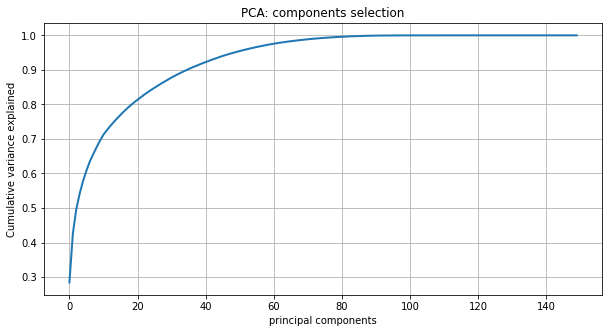

In [159]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

# Selecting only numerical metrics
stats = df.iloc[:, 11:]

# Standardizing the data
data = StandardScaler().fit_transform(stats)

# Setting up and running PCA
pca = decomposition.PCA()
pca.n_components = 150
pca_data = pd.DataFrame(pca.fit_transform(data))
pca_data.columns = ['PC_' + str(i) for i in pca_data.columns]

# % Variance explained per components
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

# Cumulative variance explained
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(10, 5))
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('principal components')
plt.ylabel('Cumulative variance explained')
plt.title('PCA: components selection')
plt.show()

In [165]:
pd.DataFrame([(i,j) for i,j in enumerate(list(cum_var_explained))], columns=['PC', 'CV'])

,PC,CV
0,0,0.284327
1,1,0.425765
2,2,0.496083
3,3,0.541431
4,4,0.578118
...,...,...
145,145,1.000000
146,146,1.000000
147,147,1.000000
148,148,1.000000


Como podemos observar, incluso solo 36 componentes explican el 90% de la varianza. Voy a seleccionar los 80 primeros componentes principales, que explican el 99,5% de la varianza. Pero, ¿qué significa esto en realidad? Demuestra que la mayoría de las variables antes estaban correlacionadas o incluso después de transformar las muestras en dimensiones más bajas, somos capaces de preservar casi toda la varianza al tiempo que abordamos los problemas de la maldición de la dimensionalidad, gracias al PCA.

In [161]:
pca_data

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65,PC_66,PC_67,PC_68,PC_69,PC_70,PC_71,PC_72,PC_73,PC_74,PC_75,PC_76,PC_77,PC_78,PC_79,PC_80,PC_81,PC_82,PC_83,PC_84,PC_85,PC_86,PC_87,PC_88,PC_89,PC_90,PC_91,PC_92,PC_93,PC_94,PC_95,PC_96,PC_97,PC_98,PC_99,PC_100,PC_101,PC_102,PC_103,PC_104,PC_105,PC_106,PC_107,PC_108,PC_109,PC_110,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120,PC_121,PC_122,PC_123,PC_124,PC_125,PC_126,PC_127,PC_128,PC_129,PC_130,PC_131,PC_132,PC_133,PC_134,PC_135,PC_136,PC_137,PC_138,PC_139,PC_140,PC_141,PC_142,PC_143,PC_144,PC_145,PC_146,PC_147,PC_148,PC_149
0,-3.460322,-1.200595,-4.184261,0.487798,-0.503263,-1.529013,0.688700,1.989008,-0.781119,-1.214299,0.251287,-0.578630,-0.051025,1.182444,0.902555,1.369898,-0.337950,0.038251,-0.437410,-1.061549,-1.250969,0.404124,-0.369945,-0.942745,-0.528821,-0.531306,2.324797,-0.804984,0.392613,0.214771,-2.004647,0.761291,-0.116083,0.568887,-0.718392,0.161417,-0.936461,0.175766,0.162472,-0.671003,-0.910840,0.100250,0.099657,-0.146678,0.011436,-0.340712,0.062147,0.023944,0.730683,-0.801785,-0.082282,-0.414825,-0.171338,-0.668846,0.264532,0.131016,0.577819,0.334780,-0.311266,0.074279,0.596786,-0.195210,0.046105,0.286135,-0.451042,-0.672060,-0.060998,0.024102,-0.507522,-0.120232,0.002602,0.552221,0.640605,-0.004766,-0.187122,0.552629,0.130682,-0.012087,-0.009010,-0.170218,-0.341724,0.067275,-0.313446,-0.041192,0.103415,-0.289688,-0.284925,0.036435,-0.019489,-0.076940,-0.010043,-0.050610,-0.045246,-0.097807,-0.015942,-0.138477,-0.060912,-0.002632,-0.099211,0.120998,-0.011784,-0.023399,-0.002433,-0.026262,0.011330,0.004706,-0.015879,-0.006204,0.016268,0.004654,-0.005080,0.006406,-0.009372,0.003259,-0.000807,0.005445,-0.005142,-0.004300,-0.000908,0.000073,0.001632,0.001735,0.001599,-0.001003,0.007640,-0.000408,-0.004561,0.001144,-0.003381,-0.006366,-0.001017,0.000079,0.000002,2.311356e-13,3.079415e-14,2.250349e-15,5.672250e-17,-3.639169e-17,2.908431e-16,1.831253e-17,-7.253356e-17,-3.401143e-17,4.790974e-17,7.035832e-17,-4.452839e-17,3.071245e-17,2.384171e-17,5.024266e-17,4.897060e-17,-1.084955e-17
1,4.162234,-0.348157,-2.495133,-3.775180,1.199258,-1.197661,-2.509943,0.442482,-0.081124,5.080417,2.136953,-1.893276,2.361515,-0.389113,-1.326291,-3.711313,-1.177346,-0.348027,1.807811,0.408930,-1.366634,-1.270001,-0.824667,1.439472,1.700551,0.796674,0.199849,-0.717486,-0.907101,0.390031,0.298704,2.118951,-0.150296,-0.363324,-1.020561,-0.817599,-0.308027,-1.275554,-0.264736,-0.808434,-1.238301,-0.861186,1.531684,0.150707,0.808199,-0.472709,0.206765,0.277542,-1.575667,2.057179,1.416746,-0.780366,-0.119532,-0.877292,-0.420306,1.243525,0.093727,-0.243053,-0.229431,-0.422888,-0.049181,-0.476955,0.002294,-0.053629,-0.476845,0.315628,0.068424,-0.448186,0.155937,0.451738,0.295686,0.240996,-0.424363,0.042559,0.004409,0.316227,0.225583,0.388001,0.495474,-0.131707,-0.218812,-0.469524,0.135781,-0.105868,-0.073005,-0.205455,-0.026787,0.248759,-0.019527,0.208853,-0.062582,-0.019798,-0.057737,0.098496,-0.003363,0.124341,0.045392,-0.023342,-0.013968,-0.116469,-0.118596,0.071114,0.003916,0.066999,-0.002093,0.003880,-0.002227,0.001534,-0.005559,-0.026762,-0.008843,-0.002100,0.006952,-0.002186,0.036947,-0.004256,0.007676,0.008055,-0.003617,0.002908,-0.000952,-0.004020,-0.002193,-0.000699,-0.000244,0.005938,0.000051,-0.000655,0.000083,0.003315,0.000450,-0.000045,0.000001,2.762651e-14,-4.352103e-14,1.563409e-14,1.377802e-14,-8.210825e-15,8.175997e-15,6.265785e-16,-5.336850e-16,-1.137804e-16,4.186070e-16,4.211849e-16,-3.985785e-16,-7.303454e-17,4.266468e-17,6.454001e-16,1.068311e-14,-1.292869e-16
2,-7.357110,-0.271867,4.409641,-0.639371,-0.086355,-0.55

In [163]:
stats = pca_data.iloc[:,:80]
stats

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65,PC_66,PC_67,PC_68,PC_69,PC_70,PC_71,PC_72,PC_73,PC_74,PC_75,PC_76,PC_77,PC_78,PC_79
0,-3.460322,-1.200595,-4.184261,0.487798,-0.503263,-1.529013,0.688700,1.989008,-0.781119,-1.214299,0.251287,-0.578630,-0.051025,1.182444,0.902555,1.369898,-0.337950,0.038251,-0.437410,-1.061549,-1.250969,0.404124,-0.369945,-0.942745,-0.528821,-0.531306,2.324797,-0.804984,0.392613,0.214771,-2.004647,0.761291,-0.116083,0.568887,-0.718392,0.161417,-0.936461,0.175766,0.162472,-0.671003,-0.910840,0.100250,0.099657,-0.146678,0.011436,-0.340712,0.062147,0.023944,0.730683,-0.801785,-0.082282,-0.414825,-0.171338,-0.668846,0.264532,0.131016,0.577819,0.334780,-0.311266,0.074279,0.596786,-0.195210,0.046105,0.286135,-0.451042,-0.672060,-0.060998,0.024102,-0.507522,-0.120232,0.002602,0.552221,0.640605,-0.004766,-0.187122,0.552629,0.130682,-0.012087,-0.009010,-0.170218
1,4.162234,-0.348157,-2.495133,-3.775180,1.199258,-1.197661,-2.509943,0.442482,-0.081124,5.080417,2.136953,-1.893276,2.361515,-0.389113,-1.326291,-3.711313,-1.177346,-0.348027,1.807811,0.408930,-1.366634,-1.270001,-0.824667,1.439472,1.700551,0.796674,0.199849,-0.717486,-0.907101,0.390031,0.298704,2.118951,-0.150296,-0.363324,-1.020561,-0.817599,-0.308027,-1.275554,-0.264736,-0.808434,-1.238301,-0.861186,1.531684,0.150707,0.808199,-0.472709,0.206765,0.277542,-1.575667,2.057179,1.416746,-0.780366,-0.119532,-0.877292,-0.420306,1.243525,0.093727,-0.243053,-0.229431,-0.422888,-0.049181,-0.476955,0.002294,-0.053629,-0.476845,0.315628,0.068424,-0.448186,0.155937,0.451738,0.295686,0.240996,-0.424363,0.042559,0.004409,0.316227,0.225583,0.388001,0.495474,-0.131707
2,-7.357110,-0.271867,4.409641,-0.639371,-0.086355,-0.550696,-1.639516,-0.081230,1.474090,-0.511614,-0.987805,0.011580,-0.667088,0.569206,-0.293049,-0.582001,1.145764,0.663514,0.583014,0.133123,-0.413546,0.079688,-0.803921,0.648574,0.876392,-0.566575,-0.091283,-0.070573,-0.456339,0.916652,0.045843,0.003607,-0.117944,-0.345560,0.811523,-0.070296,-0.016176,-0.384540,0.153652,-0.260799,-0.052105,0.853525,-0.173274,0.339938,-0.406685,0.177139,-0.182890,0.965979,0.988305,0.436428,0.637099,0.288871,0.280592,0.235280,-0.244195,0.245664,-0.057910,-0.591116,-0.097864,-0.226559,0.027435,0.297097,0.832733,-0.138756,-0.013208,-0.063065,-0.103567,0.497280,-0.537355,-0.116720,0.505778,-0.106569,0.181882,0.263143,0.133049,0.074662,0.273234,0.175493,-0.113579,-0.181323
3,-4.734160,-0.282548,0.666415,-0.150887,-3.248950,1.574547,-0.044342,0.031096,-3.244925,-0.614020,1.333638,-0.428770,0.667650,0.026508,2.061400,-0.474150,0.001054,0.268693,0.635056,-0.099264,-0.139919,0.251230,1.465501,-2.213785,-0.628223,2.147293,2.503966,1.383356,-1.246932,-0.076346,-1.953650,0.436981,0.532331,-1.552519,0.615578,0.170707,0.468236,-1.128188,0.498299,-0.228991,-0.377844,0.057784,0.237632,-0.941097,-0.199594,-0.472329,0.390803,0.124312,-0.334401,-0.266140,-0.196858,0.572068,0.471391,-0.107401,0.328635,0.164866,0.420904,0.099371,0.950007,0.528039,0.093653,-0.183095,0.224646,0.117816,0.382978,0.607121,0.170333,0.576896,0.244520,0.246736,0.051359,0.603120,-0.183154,-0.434110,-0.100956,0.596153,-0.614197,-0.100277,-0.365996,-0.510080
4,-5.994299,2.991464,-0.427876,-2.979327,0.894827,1.143563,-0.798658,-0.291792,-1.818252,-0.596708,-1.944301,-1.366952,0.224985,0.747109,-0.329027,1.593074,1.133146,1.650345,-1.098792,2.832466,0.792962,0.061110,0.575350,0.556054,-0.753678,-0.493343,0.602267,0.085182,1.526443,-0.570678,0.479867,0.308090,-0.295997,0.203332,0.498279,0.116292,-0.074140,-0.171370,-0.132728,-0.595890,-0.042809,-0.075638,0.368252,0.091492,0.186637,0.482681,0.332566,-0.552089,-0.210769,0.058267,0.5

In [185]:
df = pd.concat([df.iloc[:,:11], stats], axis=1)
df

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65,PC_66,PC_67,PC_68,PC_69,PC_70,PC_71,PC_72,PC_73,PC_74,PC_75,PC_76,PC_77,PC_78,PC_79
0,Max Aarons,ENG,DF,Bournemouth,Premier League,24,2000,14,12,1085,12.1,-3.460322,-1.200595,-4.184261,0.487798,-0.503263,-1.529013,0.688700,1.989008,-0.781119,-1.214299,0.251287,-0.578630,-0.051025,1.182444,0.902555,1.369898,-0.337950,0.038251,-0.437410,-1.061549,-1.250969,0.404124,-0.369945,-0.942745,-0.528821,-0.531306,2.324797,-0.804984,0.392613,0.214771,-2.004647,0.761291,-0.116083,0.568887,-0.718392,0.161417,-0.936461,0.175766,0.162472,-0.671003,-0.910840,0.100250,0.099657,-0.146678,0.011436,-0.340712,0.062147,0.023944,0.730683,-0.801785,-0.082282,-0.414825,-0.171338,-0.668846,0.264532,0.131016,0.577819,0.334780,-0.311266,0.074279,0.596786,-0.195210,0.046105,0.286135,-0.451042,-0.672060,-0.060998,0.024102,-0.507522,-0.120232,0.002602,0.552221,0.640605,-0.004766,-0.187122,0.552629,0.130682,-0.012087,-0.009010,-0.170218
1,Brenden Aaronson,USA,MF-FW,Union Berlin,Bundesliga,23,2000,22,7,695,7.7,4.162234,-0.348157,-2.495133,-3.775180,1.199258,-1.197661,-2.509943,0.442482,-0.081124,5.080417,2.136953,-1.893276,2.361515,-0.389113,-1.326291,-3.711313,-1.177346,-0.348027,1.807811,0.408930,-1.366634,-1.270001,-0.824667,1.439472,1.700551,0.796674,0.199849,-0.717486,-0.907101,0.390031,0.298704,2.118951,-0.150296,-0.363324,-1.020561,-0.817599,-0.308027,-1.275554,-0.264736,-0.808434,-1.238301,-0.861186,1.531684,0.150707,0.808199,-0.472709,0.206765,0.277542,-1.575667,2.057179,1.416746,-0.780366,-0.119532,-0.877292,-0.420306,1.243525,0.093727,-0.243053,-0.229431,-0.422888,-0.049181,-0.476955,0.002294,-0.053629,-0.476845,0.315628,0.068424,-0.448186,0.155937,0.451738,0.295686,0.240996,-0.424363,0.042559,0.004409,0.316227,0.225583,0.388001,0.495474,-0.131707
2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,36,1987,23,23,2061,22.9,-7.357110,-0.271867,4.409641,-0.639371,-0.086355,-0.550696,-1.639516,-0.081230,1.474090,-0.511614,-0.987805,0.011580,-0.667088,0.569206,-0.293049,-0.582001,1.145764,0.663514,0.583014,0.133123,-0.413546,0.079688,-0.803921,0.648574,0.876392,-0.566575,-0.091283,-0.070573,-0.456339,0.916652,0.045843,0.003607,-0.117944,-0.345560,0.811523,-0.070296,-0.016176,-0.384540,0.153652,-0.260799,-0.052105,0.853525,-0.173274,0.339938,-0.406685,0.177139,-0.182890,0.965979,0.988305,0.436428,0.637099,0.288871,0.280592,0.235280,-0.244195,0.245664,-0.057910,-0.591116,-0.097864,-0.226559,0.027435,0.297097,0.832733,-0.138756,-0.013208,-0.063065,-0.103567,0.497280,-0.537355,-0.116720,0.505778,-0.106569,0.181882,0.263143,0.133049,0.074662,0.273234,0.175493,-0.113579,-0.181323
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,24,2000,24,16,1462,16.2,-4.734160,-0.282548,0.666415,-0.150887,-3.248950,1.574547,-0.044342,0.031096,-3.244925,-0.614020,1.333638,-0.428770,0.667650,0.026508,2.061400,-0.474150,0.001054,0.268693,0.635056,-0.099264,-0.139919,0.251230,1.465501,-2.213785,-0.628223,2.147293,2.503966,1.383356,-1.246932,-0.076346,-1.953650,0.436981,0.532331,-1.552519,0.615578,0.170707,0.468236,-1.128188,0.498299,-0.228991,-0.377844,0.057784,0.237632,-0.941097,-0.199594,-0.472329,0.390803,0.124312,-0.334401,-0.266140,-0.196858,0.572068,0.471391,-0.107401,0.328635,0.164866,0.420904,0.099371,0.950007,0.528039,0.093653,-0.183095,0.224646,0.117816,0.382978,0.607121,0.170333,0.576896,0.244520,0.246736,0.051359,0.603120,-0.183154,-0.434110,-0.100956,0.596153,-0.614197,-0.100277,-0.365996,-0.510080
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,31,1993,26,26,2306,25.6,-5.994299,2.991464,-0.427876,-2.979327,0.894827,1.143563,-0.798658,-0.291792,-1.818252,-0.59

## Recommendation system

In [4]:
from scipy.spatial import distance

# Fetch the player vector
def getStats(name):
    return df.query('Player == @name').iloc[:,11:]

# Fetch cosine similarity between two player vectors
def similarity(player1, player2):
    return 1 - distance.cosine(getStats(player1), getStats(player2))

In [5]:
similarity('Toni Kroos', 'Joshua Kimmich')

0.8304111185933529

In [7]:
similarity_vectorize = np.vectorize(similarity)
pivot = pd.DataFrame(similarity_vectorize('Jamal Musiala', df['Player'])) \
    .sort_values(by=0, ascending=False) \
        .iloc[1:].rename(columns={0: 'Similarity'})
pivot = pivot.join(df.iloc[:,:11])
pivot = pivot[['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Similarity']] \
    .rename(columns={'Pos': 'Position', 'Comp': 'Competition'})
pivot['Similarity'] = pivot['Similarity'] * 100
pivot['Similarity'] = pivot['Similarity'].map('{:.2f}'.format).astype(str) + '%'
pivot = pivot.reset_index(drop=True)
pivot.head(5)

,Player,Nation,Position,Squad,Competition,Age,Similarity
0,Brahim Díaz,MAR,FW-MF,Real Madrid,La Liga,24,89.28%
1,Florian Wirtz,GER,MF,Leverkusen,Bundesliga,20,82.68%
2,Mathys Tel,FRA,FW-MF,Bayern Munich,Bundesliga,18,82.48%
3,Xavi Simons,NED,MF,RB Leipzig,Bundesliga,20,82.13%
4,Leon Bailey,JAM,MF-FW,Aston Villa,Premier League,26,80.88%
